In [ ]:
!pip install -U matplotlib

In [2]:
%matplotlib inline

In [37]:
import pandas as pd

df = pd.read_csv("/network/rshaw/vllm-benchmarking/server_benchmarking/results_4xA4000/results.csv")

df.head()

,model_name,gpu_type,input_tokens,output_tokens,qps,best_of,use_beam_search,num_prompts,mean_latency,p50_latency,p90_latency,p95_latency,p99_latency,p100_latency
0,mistralai/Mistral-7B-v0.1,4xA4000,256,128,1.0,1,False,50,2.108121,2.097541,2.285520,2.295095,2.305957,2.308785
1,mistralai/Mistral-7B-v0.1,4xA4000,256,256,1.0,1,False,50,4.609149,4.604729,4.983065,5.001419,5.033868,5.053764
2,mistralai/Mistral-7B-v0.1,4xA4000,512,128,1.0,1,False,50,2.325657,2.331337,2.538878,2.588871,2.621432,2.629553
3,mistralai/Mistral-7B-v0.1,4xA4000,512,256,1.0,1,False,50,4.910409,4.928584,5.289564,5.403558,5.437302,5.456207
4,mistralai/Mistral-7B-v0.1,4xA4000,256,128,2.0,1,False,50,2.378481,2.389307,2.572564,2.625036,2.650214,2.666111


In [38]:
def filter_df(df, input_tokens, output_tokens):
    df = df[df["input_tokens"] == input_tokens]
    df = df[df["output_tokens"] == output_tokens]
    return df

def process_results(df, title, workload_shapes, models, gpu_type):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title)

    for idx, model in enumerate(models):
        df_ = df
        df_ = df_[df_["model_name"] == model]
        df_ = df_[df_["gpu_type"] == gpu_type]
        ax = fig.add_subplot(1,len(models),idx+1)
        title = f"{gpu_type}: {model}"
        scatter(ax, df_, title=title, workload_shapes=workload_shapes)

def scatter(ax, df, title, workload_shapes):
    ax.set_title(title)
    ax.set_xlabel("QPS")
    ax.set_ylabel("E2E Request Latency (s)")

    for input_tokens, output_tokens in workload_shapes:
        label = f"[{input_tokens}, {output_tokens}]"
        df_ = filter_df(df, input_tokens, output_tokens)
        ax.scatter(df_["qps"], df_["mean_latency"], label=label)
        ax.legend(loc='lower right')

In [40]:
df["model_name"]

0                  mistralai/Mistral-7B-v0.1
1                  mistralai/Mistral-7B-v0.1
2                  mistralai/Mistral-7B-v0.1
3                  mistralai/Mistral-7B-v0.1
4                  mistralai/Mistral-7B-v0.1
5                  mistralai/Mistral-7B-v0.1
6                  mistralai/Mistral-7B-v0.1
7                  mistralai/Mistral-7B-v0.1
8                  mistralai/Mistral-7B-v0.1
9                  mistralai/Mistral-7B-v0.1
10                 mistralai/Mistral-7B-v0.1
11                 mistralai/Mistral-7B-v0.1
12                 mistralai/Mistral-7B-v0.1
13                 mistralai/Mistral-7B-v0.1
14                 mistralai/Mistral-7B-v0.1
15                 mistralai/Mistral-7B-v0.1
16                 mistralai/Mistral-7B-v0.1
17                 mistralai/Mistral-7B-v0.1
18                 mistralai/Mistral-7B-v0.1
19                 mistralai/Mistral-7B-v0.1
20    TheBloke/Mistral-7B-Instruct-v0.2-GPTQ
21    TheBloke/Mistral-7B-Instruct-v0.2-GPTQ
22    TheB

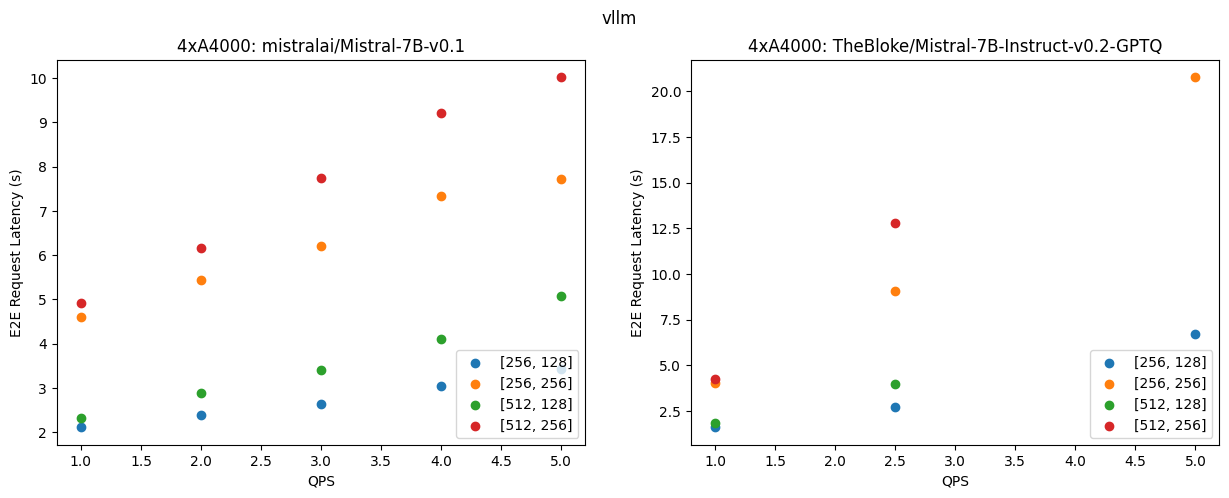

In [41]:
import matplotlib.pyplot as plt

workload_shapes = [
    (256, 128),
    (256, 256),
    (512, 128),
    (512, 256),
]

models = ["mistralai/Mistral-7B-v0.1", "TheBloke/Mistral-7B-Instruct-v0.2-GPTQ"]
gpu_type = "4xA4000"

process_results(df, title="vllm", workload_shapes=workload_shapes, models=models, gpu_type=gpu_type)